In [41]:
from sklearn.decomposition import PCA
import pickle
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold

By leveraging GLCM features as per https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=e3c9c7d735c1fd8319e34fd3db37973c44802a68#page=291. From there the following stats were created. 

# Dataset

In [44]:
df = pd.read_csv('./glcm_features.csv')
df.head(15)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,contrast,correlation,energy,dissimilarity,ASM,homogeneity,class_name,class
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70.145850,0.983722,0.639422,1.374290,0.408860,0.767913,NV,1
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.852525,0.988569,0.566694,1.579670,0.321143,0.721944,NV,1
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,75.269902,0.977776,0.611218,2.031104,0.373588,0.704211,NV,1
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51.318449,0.987625,0.629077,1.051011,0.395738,0.782308,NV,1
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,82.851130,0.980018,0.744398,1.739521,0.554128,0.796600,MEL,0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,59.808792,0.987204,0.688260,1.274628,0.473702,0.782926,NV,1
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98.016375,0.990480,0.550889,1.802753,0.303478,0.692680,BKL,4
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.633307,0.986193,0.884695,0.706073,0.782685,0.911425,MEL,0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46.383691,0.987935,0.884976,0.580946,0.783182,0.921805,NV,1
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,33.705880,0.969547,0.907900,0.677106,0.824283,0.927561,MEL,0


## Class Labels

In [45]:
df.loc[:,['class_name','class']].drop_duplicates().sort_values(by='class')

,class_name,class
4,MEL,0
0,NV,1
25,BCC,2
23,AKIEC,3
6,BKL,4
12,DF,5
64,VASC,6


In [46]:
x,y = df.loc[:,['contrast','correlation','energy','dissimilarity','ASM','homogeneity']],\
df.loc[:,['class']]
classes = df.loc[:,['class_name']]

In [6]:
# Perform PCA with 1 principal component
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [9.99728280e-01 2.45387645e-04 2.53393253e-05]


In [15]:
y.values.flatten()

array([1, 1, 1, ..., 4, 1, 1])

# Feature Reduction using PCA

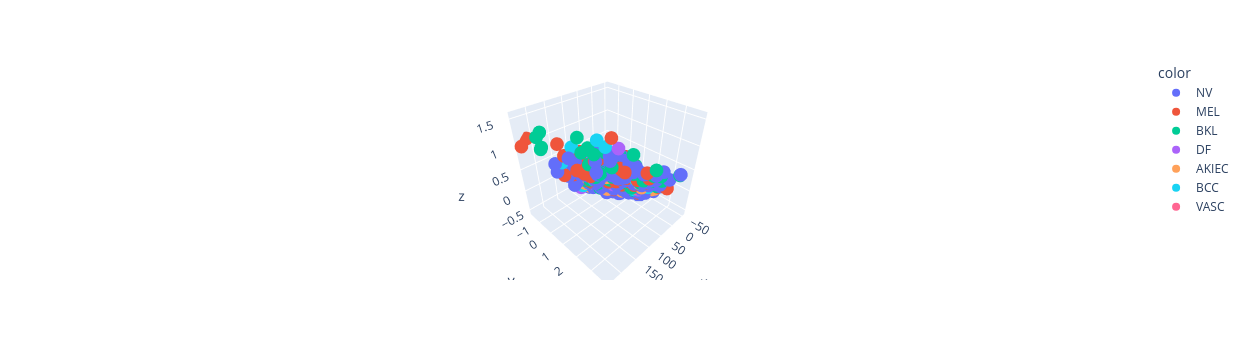

In [19]:
fig = px.scatter_3d(pca_result, x=pca_result[:,0], y=pca_result[:,1], z=pca_result[:,2], color=classes.values.flatten())
fig.show()

# Class Imbalance
The problem for tackling class imbalance was done using SMOTE.

Class distribution before oversampling: Counter({1: 6705, 0: 1113, 4: 1099, 2: 514, 3: 327, 6: 142, 5: 115})
Class distribution after oversampling: Counter({1: 6705, 0: 6705, 4: 6705, 5: 6705, 3: 6705, 2: 6705, 6: 6705})


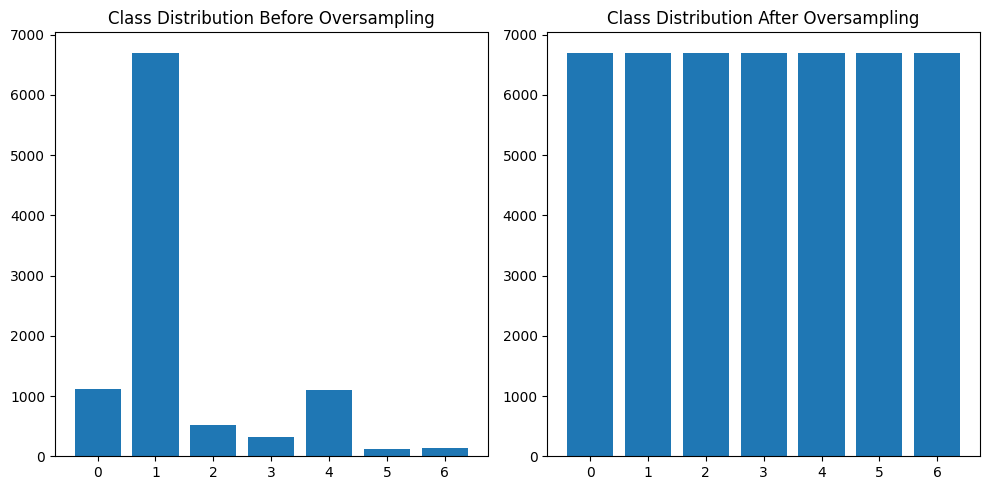

In [47]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto')
#y = list(map(return_key,loaded_dict['labels']))
X_resampled, y_resampled = smote.fit_resample(pca_result, y.values.flatten())
#print(y_resampled)
print("Class distribution before oversampling:", Counter(y.values.flatten()))

# Count class distribution after oversampling
#y_resampled = list(map(return_key,y_resampled))
print("Class distribution after oversampling:", Counter(y_resampled))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(Counter(y.values.flatten()).keys(), Counter(y.values.flatten()).values())
ax1.set_title("Class Distribution Before Oversampling")

ax2.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
ax2.set_title("Class Distribution After Oversampling")

plt.tight_layout()
plt.show()

In [48]:
# Number of desired folds
n_splits = 10

# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Iterate through each fold
X = X_resampled;y = y_resampled
#y = np.array(list(map(lambda x:preprocess_category(x),y)))
svm_stats = {'Fold':[],'accuracy':[]}
rf_stats = {'Fold':[],'accuracy':[]}
ada_stats = {'Fold':[],'accuracy':[]}
cm_svm = None
cm_rf = None
cm_ada = None
count=0
model_svm = SVC()
model_rf = RandomForestClassifier()
model_ada = AdaBoostClassifier()
total_cm_svm = np.zeros((7,7))
total_cm_rf = np.zeros((7,7))
total_cm_ada = np.zeros((7,7)) 
#y = loaded_dict['labels']
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #y_train = np.array(list(map(lambda x:loaded_dict['class_metadata'][x],y_train)))
    #y_test = np.array(list(map(lambda x:loaded_dict['class_metadata'][x],y_test)))
    # Initialize and train your model
    # Replace with your chosen model
    model_svm.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model_svm.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    #print('SVM fold {}'.format(count))
    #print(f"Accuracy for this fold: {accuracy}")
    fold_confusion_svm = confusion_matrix(y_test, y_pred)
    #TN = cm[0, 0]
    #FP = cm[0, 1]
    #FN = cm[1, 0]
    #TP = cm[1, 1]

    # Calculate Sensitivity (Recall)
    #sensitivity = TP / (TP + FN)

    # Calculate Specificity
    #specificity = TN / (TN + FP)
    svm_stats['Fold'].append(count)
    #svm_stats['TN'].append(TN)
    #svm_stats['TP'].append(TP)
    #svm_stats['FP'].append(FP)
    #svm_stats['FN'].append(FN)
    svm_stats['accuracy'].append(accuracy)
    #svm_stats['sensitivity'].append(sensitivity)
    #svm_stats['specificity'].append(specificity)
    
    
    
    
    # Replace with your chosen model
    model_rf.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model_rf.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Accuracy for this fold: {accuracy}")
    #y_test = list(map(return_key,y_test))
    #y_test = list(map(return_key,y_pred))
    fold_confusion_rf = confusion_matrix(y_test, y_pred)
    #TN = cm[0, 0]
    #FP = cm[0, 1]
    #FN = cm[1, 0]
    #TP = cm[1, 1]

    # Calculate Sensitivity (Recall)
    #sensitivity = TP / (TP + FN)

    # Calculate Specificity
    #specificity = TN / (TN + FP)
    rf_stats['Fold'].append(count)
    #rf_stats['TN'].append(TN)
    #rf_stats['TP'].append(TP)
    #rf_stats['FP'].append(FP)
    #rf_stats['FN'].append(FN)
    rf_stats['accuracy'].append(accuracy)
    #rf_stats['sensitivity'].append(sensitivity)
    #rf_stats['specificity'].append(specificity)
    # Perform training and testing using X_train, X_test, y_train, y_test
    # Train your model and evaluate its performance
    
    
    # Replace with your chosen model
    model_ada.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model_ada.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    #print(f"Accuracy for this fold: {accuracy}")
    fold_confusion_ada = confusion_matrix(y_test, y_pred)
    #TN = cm[0, 0]
    #FP = cm[0, 1]
    #FN = cm[1, 0]
    #TP = cm[1, 1]

    # Calculate Sensitivity (Recall)
    #sensitivity = TP / (TP + FN)

    # Calculate Specificity
    #specificity = TN / (TN + FP)
    ada_stats['Fold'].append(count)
    #ada_stats['TN'].append(TN)
    #ada_stats['TP'].append(TP)
    #ada_stats['FP'].append(FP)
    #ada_stats['FN'].append(FN)
    ada_stats['accuracy'].append(accuracy)
    #ada_stats['sensitivity'].append(sensitivity)
    #ada_stats['specificity'].append(specificity)
    total_cm_svm += fold_confusion_svm
    total_cm_rf += fold_confusion_rf
    total_cm_ada += fold_confusion_ada

    count+=1

In [49]:
df_svm = pd.DataFrame(svm_stats)
df_rf = pd.DataFrame(rf_stats)
df_ada = pd.DataFrame(ada_stats)

# SVM

## Stratified 10-fold cross validation.

In [50]:
df_svm.head(10)

,Fold,accuracy
0,0,0.266937
1,1,0.279719
2,2,0.288453
3,3,0.277162
4,4,0.282062
5,5,0.284253
6,6,0.279139
7,7,0.279991
8,8,0.282975
9,9,0.266567


## Confusion Matrix

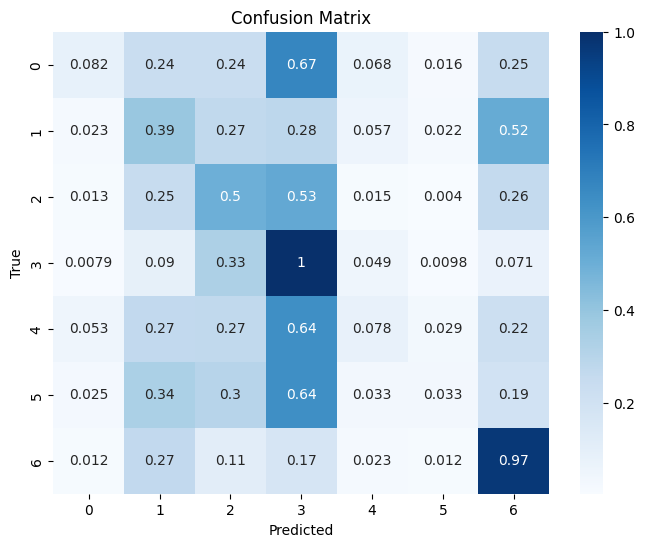

In [51]:
TN = total_cm_svm[0, 0]
FP = total_cm_svm[0, 1]
FN = total_cm_svm[1, 0]
TP = total_cm_svm[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(total_cm_svm/np.max(total_cm_svm), annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [52]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
support = TP + FN

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Support:", support)

Precision: 0.6205621301775148
Recall: 0.9448198198198198
F1-Score: 0.749107142857143
Support: 1776.0


# Random Forrest

## Stratified 10-Fold cross validation

In [53]:
df_rf.head(10)

,Fold,accuracy
0,0,0.710908
1,1,0.704516
2,2,0.714955
3,3,0.699830
4,4,0.696634
5,5,0.699126
6,6,0.710420
7,7,0.721713
8,8,0.701896
9,9,0.701683


## Confusion Matrix

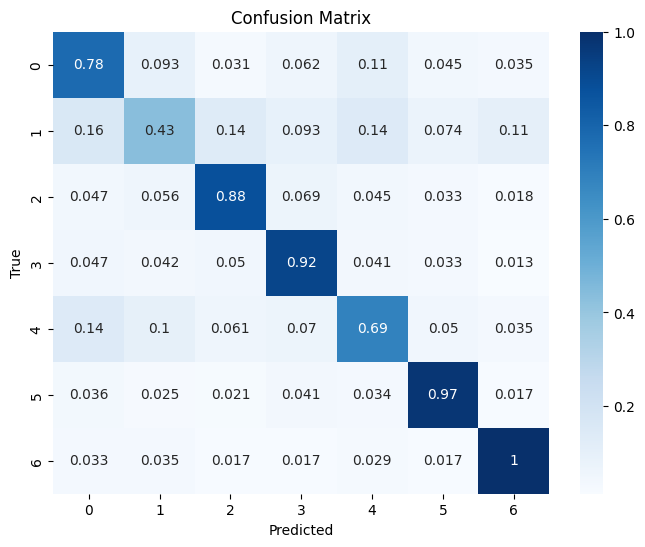

In [54]:
TN = total_cm_rf[0, 0]
FP = total_cm_rf[0, 1]
FN = total_cm_rf[1, 0]
TP = total_cm_rf[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(total_cm_rf/np.max(total_cm_rf), annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [55]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
support = TP + FN

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Support:", support)

Precision: 0.8242936018187723
Recall: 0.7295199770048865
F1-Score: 0.7740164684354988
Support: 3479.0


# Adaboost

## Stratified 10-fold cross validation

In [56]:
df_ada.head(10)

,Fold,accuracy
0,0,0.317213
1,1,0.317640
2,2,0.310822
3,3,0.317213
4,4,0.311888
5,5,0.316429
6,6,0.330066
7,7,0.322821
8,8,0.326444
9,9,0.309397


## Confusion Matrix

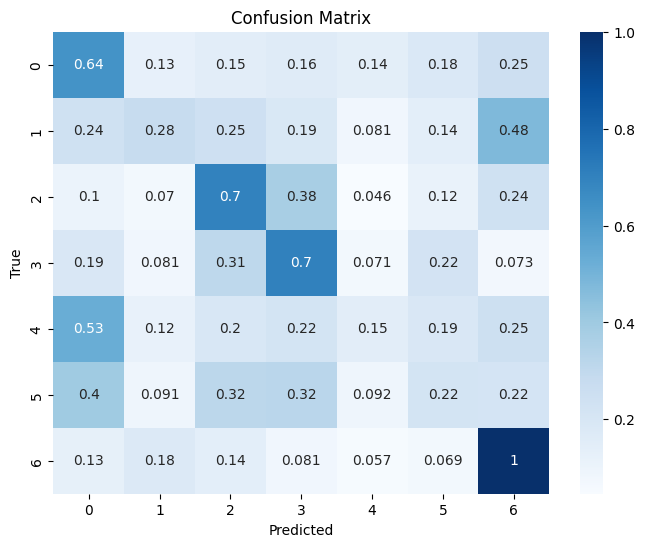

In [57]:
TN = total_cm_ada[0, 0]
FP = total_cm_ada[0, 1]
FN = total_cm_ada[1, 0]
TP = total_cm_ada[1, 1]

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(total_cm_ada/np.max(total_cm_ada), annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [32]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
support = TP + FN
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("Support:", support)

Precision: 0.6688773093320701
Recall: 0.6283934134401424
F1-Score: 0.6480036714089032
Support: 2247.0
